# Introduction 07_FPHDP_VotingClassifier


Our estimator selection logic: predicting category > with labeled data > less than 100K sample > Linear SVC > if not working > KNeighbors Classifier > if not working > SVC or Ensemble Classifiers


### Import Libraries

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_curve, auc, recall_score, precision_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import neighbors


np.random.seed(42)

In [ ]:
#Pandas dataframe
heart = pd.read_csv("/content/heart.csv")

In [ ]:
#https://www.youtube.com/watch?v=JR92LxKgMBE
numeric_features = heart.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [ ]:
categorical_features = heart.select_dtypes(include=[object])
categorical_features.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:

X= heart.drop('HeartDisease', axis=1)

y = heart['HeartDisease']

In [ ]:
X.shape


(918, 11)

In [ ]:
y.shape

(918,)

In [ ]:
# Verifying X has the features I expect
X.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [ ]:
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
)

clf_1 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: idea to
# startify y so that we have balanced response values within test set and
# training set.
# another resource on stratify y from Data School:
# https://www.youtube.com/watch?v=Zcjl8xPLmPw
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

clf_1.fit(X_train, y_train)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: looking at accuracy score
X_train_prediction = clf_1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data :", training_data_accuracy)


print("model score on test set: %.3f" % clf_1.score(X_test, y_test))

Accuracy on training data : 0.8596730245231607
model score on test set: 0.886


AttributeError: 'LinearSVC' object has no attribute 'predict_proba'


LinearSVC_classifier = SklearnClassifier(SVC(kernel='linear',probability=True))

https://stackoverflow.com/questions/47312432/attributeerrorlinearsvc-object-has-no-attribute-predict-proba

In [ ]:
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
)

#clf_2 = Pipeline(
   # steps=[("preprocessor", preprocessor), ("classifier", LinearSVC(dual = False))]
#)

clf_2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC(kernel='linear', probability=True))]
)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: idea to
# startify y so that we have balanced response values within test set and
# training set.
# another resource on stratify y from Data School:
# https://www.youtube.com/watch?v=Zcjl8xPLmPw
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

clf_2.fit(X_train, y_train)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: looking at accuracy score
X_train_prediction = clf_2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data :", training_data_accuracy)


print("model score on test set: %.3f" % clf_2.score(X_test, y_test))

Accuracy on training data : 0.8637602179836512
model score on test set: 0.880


In [ ]:
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
)

clf_3 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", neighbors.KNeighborsClassifier())]
)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: idea to
# startify y so that we have balanced response values within test set and
# training set.
# another resource on stratify y from Data School:
# https://www.youtube.com/watch?v=Zcjl8xPLmPw
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

clf_3.fit(X_train, y_train)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: looking at accuracy score
X_train_prediction = clf_3.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data :", training_data_accuracy)


print("model score on test set: %.3f" % clf_3.score(X_test, y_test))

Accuracy on training data : 0.8814713896457765
model score on test set: 0.897


In [ ]:
missingvalue = ['RestingBP', 'Cholesterol']
mvtransformer = Pipeline(
    steps=[("imputer", KNNImputer(missing_values=0, n_neighbors=5)), ("scaler", StandardScaler())]
)

numregular = ['Age', 'FastingBS', 'MaxHR', 'Oldpeak']
numregulartransformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("nummv", mvtransformer, missingvalue),
        ("numreg", numregulartransformer, numregular),
        ("cat", categorical_transformer, categorical_features),
    ],
)

clf_4 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(n_estimators=100))]
)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: idea to
# startify y so that we have a balanced response values within test set and
# training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

clf_4.fit(X_train, y_train)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: looking at accuracy score
X_train_prediction = clf_4.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data :", training_data_accuracy)


print("model score on test set: %.3f" % clf_4.score(X_test, y_test))

Accuracy on training data : 1.0
model score on test set: 0.880


https://towardsdatascience.com/one-common-misconception-about-random-forest-and-overfitting-47cae2e2c23b

In [ ]:
vc=VotingClassifier([('clf1', clf_1),('clf2', clf_2),('clf3', clf_3), ('clf4', clf_4)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

vc.fit(X_train, y_train)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: looking at accuracy score
X_train_prediction = vc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data :", training_data_accuracy)


print("model score on test set: %.3f" % vc.score(X_test, y_test))

Accuracy on training data : 0.8828337874659401
model score on test set: 0.908


In [ ]:
param_grid = {
    'voting': ['hard', 'soft']}



grid_search = GridSearchCV(vc, param_grid, cv=10)
grid_search

GridSearchCV(cv=10,
             estimator=VotingClassifier(estimators=[('clf1',
                                                     Pipeline(steps=[('preprocessor',
                                                                      ColumnTransformer(transformers=[('num',
                                                                                                       Pipeline(steps=[('imputer',
                                                                                                                        SimpleImputer(strategy='median')),
                                                                                                                       ('scaler',
                                                                                                                        StandardScaler())]),
                                                                                                       ['Age',
                                                       

In [ ]:
grid_search.estimator.get_params().keys()

dict_keys(['estimators', 'flatten_transform', 'n_jobs', 'verbose', 'voting', 'weights', 'clf1', 'clf2', 'clf3', 'clf4', 'clf1__memory', 'clf1__steps', 'clf1__verbose', 'clf1__preprocessor', 'clf1__classifier', 'clf1__preprocessor__n_jobs', 'clf1__preprocessor__remainder', 'clf1__preprocessor__sparse_threshold', 'clf1__preprocessor__transformer_weights', 'clf1__preprocessor__transformers', 'clf1__preprocessor__verbose', 'clf1__preprocessor__verbose_feature_names_out', 'clf1__preprocessor__num', 'clf1__preprocessor__cat', 'clf1__preprocessor__num__memory', 'clf1__preprocessor__num__steps', 'clf1__preprocessor__num__verbose', 'clf1__preprocessor__num__imputer', 'clf1__preprocessor__num__scaler', 'clf1__preprocessor__num__imputer__add_indicator', 'clf1__preprocessor__num__imputer__copy', 'clf1__preprocessor__num__imputer__fill_value', 'clf1__preprocessor__num__imputer__missing_values', 'clf1__preprocessor__num__imputer__strategy', 'clf1__preprocessor__num__imputer__verbose', 'clf1__preproc

In [ ]:
grid_search.fit(X_train, y_train)

print("Best params:")
print(grid_search.best_params_)

Best params:
{'voting': 'soft'}


In [ ]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.864


In [ ]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_voting,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,0.709259,0.133894,0.098575,0.042776,soft,{'voting': 'soft'},0.905405,0.918919,0.837838,0.905405,0.876712,0.863014,0.835616,0.876712,0.808219,0.808219,0.863606,0.038053,1
0,0.896576,0.171648,0.128996,0.048451,hard,{'voting': 'hard'},0.878378,0.905405,0.837838,0.878378,0.849315,0.835616,0.849315,0.876712,0.808219,0.780822,0.850000,0.035044,2


'The best hyper-parameters have been used to re-fit a final model on the full training set. We can evaluate that final model on held out test data that was not used for hyperparameter tuning.'

In [ ]:
print(
    (
        "best VotingClassifier from grid search: %.3f"
        % grid_search.score(X_test, y_test)
    )
)

best VotingClassifier from grid search: 0.891


**https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py**

Above code and text can be found in the link to the Column Transformer example in Sci-Kit Learn.

In [ ]:
heartdisease_y_pred = vc.predict(X_test)
heartdisease_y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1])

The GridSearchCV object itself doesn't have a coefficient, because it's not an estimator, it's an object that cycles through parameters and trains various estimators.
https://stackoverflow.com/questions/62776587/python-gridsearchcv-object-has-no-attribute-coef

In [ ]:
y_test.shape



(184,)

In [ ]:
heartdisease_y_pred.shape

(184,)

In [ ]:
# Both arguments require the same number of samples
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, heartdisease_y_pred)

array([[73,  9],
       [ 8, 94]])

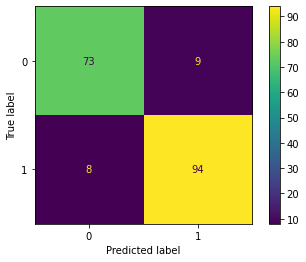

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, heartdisease_y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

#TN | FP
#FN | TP

#Even though the L-to-R diagonal is high valued, is it acceptable to have 7
#false negatives when it means failure to diagnose a real case of heart disease?

In [ ]:
accuracy_score(y_test, heartdisease_y_pred) # Classification accuracy = (TP + TN)/(TP + TN + FP + FN)

0.907608695652174

In [ ]:
1-accuracy_score(y_test, heartdisease_y_pred) #Classification error = (FP + FN)/(TP + TN + FP + FN)

0.09239130434782605

Specificity: when the actual value is negative how often is the prediction correct? TN/(TN+FP) = 69/(69+13)= 69/82 = 0.841463

False Positive Rate: when the actual value is negative, how often is the prediction incorrect? FP/(TN+FP) = 13/(69+13) = .158537

The roc curve requires either the probabilities or the non-thresholded decision values from the estimator. Since the logistic regression provides a decision function, we will use it to plot the roc curve:
https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

**RocCurveDisplay** for Voting Classifier

0.9059062649450023


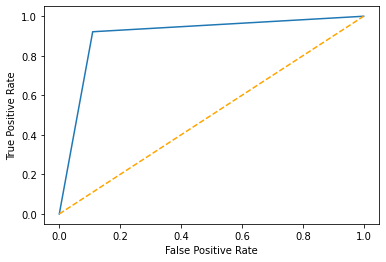

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = vc.predict(X_test)
import matplotlib.pyplot as plt


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label = vc.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], color="orange", linestyle="--")
print(roc_auc)

ROC curves typically feature true positive rate (Sensitivity; recall; probability of detection) on the Y axis, and false positive rate (1-Specificity; the probability of false alarm) on the X axis, for all possible classificaton thresholds ranging from 0 to 1. This is the advantage: ROC curve visualizes all possible classification thresholds. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate. ROC curves are typically used in binary classification to study the output of a classifier.
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html?highlight=area%20under%20curve

The following is courtesy of Data School's https://www.youtube.com/watch?v=OAl6eAyP-yo
True Positive Rate = true positives / all positives
When the actual classification is positive (Heart Disease in this case), how often does the classifier predict positive? Range [0, 1]

False Positive Rate = false positives / all negatives
When the actual classification is negative (no Heart Disease in this case), how often does the classifier incorrectly predict positive? Range [0, 1]

ROC curves are useful even if your predicted probabilities are not properly calibrated from 0 to 1. What matters is how well the classifier separated the two classes. AUC represents the the probability that a classifier will rank a randomly choesn positive observation higher than a randomly chosen negative observation; AUC is a useful metric even when classes are highly unbalanced.

ROC curves can be extended to problems with three or more classes using a One-Versus-All approach.

Choosing a classification threshold depends on whether you want to minimize FPR or maximize TPR. A low threshhold may result in a lot of False Positives but may be considered desireable if the goal is to collect all true positives and minimize a case where a real instance is misclassified. The ROC course will help you understand the impact of your choice of threshhold.

Here is a link to understan the ROC curve, pointed out by Data School:
http://www.navan.name/roc/


**PrecisionRecallDisplay**

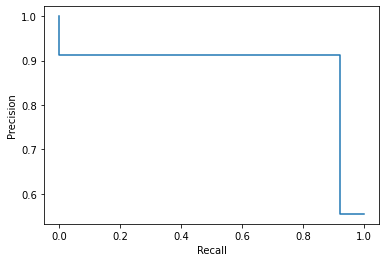

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=vc.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, **precision** is a measure of result relevancy (**out of all predictions**, how many were correctly classified for the given class; TP/(TP+FP), while **recall** (truth as baseline; **out of all actual positives for the given class**, how many were correctly classified; TP/(TP+FN)) is a measure of how many truly relevant results are returned.
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

Precision-recall curves are typically used in binary classification to study the output of a classifier.
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

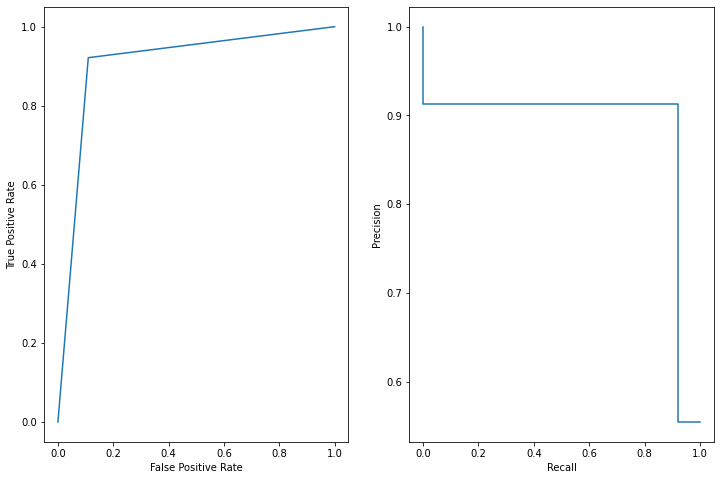

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

**Build a predictive system, courtesy https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan** and https://machinelearningmastery.com/how-to-connect-model-input-data-with-predictions-for-machine-learning/

In [ ]:
#array
cols = ['Age', 'Sex','ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak' , 'ST_Slope']

# copy/paste just instance values into first array; include parentheses around string
df = pd.DataFrame([[49,'F','ATA',110,208,0,'Normal',160,'N',0,'Up']], columns = cols)
prediction = vc.predict(df)

print(prediction)

if prediction[0]==0 :
  print('This patient does not have heart disease')
else:
  print('This patient has heart disease')



[0]
This patient does not have heart disease


https://www.youtube.com/watch?v=2lq2k6J3GW4

https://www.youtube.com/watch?v=Ld8-_WP0G90
StatifiedKFold for classification:-)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

https://www.youtube.com/watch?v=2lq2k6J3GW4&t=40s